### <center> Simualción Trace-Driven </center>

Se usan los valores de los datos en si mismos para conducir la simulación

#### 1. Librerías necesarios

In [29]:
import random
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import rv_histogram

#### 2. Entradas Conocidas

In [30]:
df = pd.read_excel("DatosEntrada.xlsx", sheet_name="Hoja1")
grupos = int(round(1+3.33*math.log10(100),0))
ventas_hist = np.histogram(df["Ventas"], bins=grupos, density=True)
costos_hist = np.histogram(df["Costos"], bins=grupos, density=True)
ventas_empirical_dist = rv_histogram(ventas_hist)
costos_empirical_dist = rv_histogram(costos_hist)

#### 3. Variables de Decisión
En este modelo particular no hacemos uso de estas variables

#### 4. Entradas Inciertas

In [31]:
ventas_simuladas = ventas_empirical_dist.rvs(size=1000)
costos_simulados = costos_empirical_dist.rvs(size=1000)

#### 5. Cálculos Intermedios

In [40]:
# df["Beneficio"] = df["Ventas"] - df["Costos"]
beneficio = ventas_simuladas - costos_simulados

#### 6. Salidas

In [6]:
beneficio_out = df["Beneficio"]

#### 7. Resumen
#### **7.1 Podemos hacer un resumen estadístico básico con `pandas`**

In [42]:
#print(round(pd.DataFrame(beneficio_out, columns=["Beneficio"]).describe(),2))
print(round(pd.DataFrame(beneficio, columns=["Beneficio"]).describe(),2))

       Beneficio
count    1000.00
mean       21.37
std        25.21
min       -49.58
25%         4.27
50%        20.28
75%        37.34
max        96.04


#### **7.2 Podemos hacer un resumen estadístico básico con `scipy.stats.describe`**

In [36]:
from scipy.stats import describe
resumen = describe(beneficio, ddof=1)

print("Número de elemento:", resumen.nobs)
minimo, maximo = resumen.minmax
print(f'Mínimo y Máximo: ({minimo:.2f},{maximo:.2f})')
print("Media:", resumen.mean)
print("Varianza:", resumen.variance)
print("Desviación:",np.sqrt(resumen.variance))

Número de elemento: 1000
Mínimo y Máximo: (-49.58,96.04)
Media: 21.36814683980828
Varianza: 635.4128404584186
Desviación: 25.207396542650304


#### **7.3 Podemos hacer un resumen estadístico básico con numpy** `numpy`

In [9]:
resumennp = {
    "Media": np.mean(beneficio_out),
    "Mediana": np.median(beneficio_out),
    "Desviación estándar": np.std(beneficio_out,ddof=1),
    "Varianza": np.var(beneficio_out,ddof=1),
    "Mínimo": np.min(beneficio_out),
    "Máximo": np.max(beneficio_out),
    "Rango": np.ptp(beneficio_out),
    "Percentil 25": np.percentile(beneficio_out, 25),
    "Percentil 50": np.percentile(beneficio_out, 50),
    "Percentil 75": np.percentile(beneficio_out, 75)
}

# Mostrar el resumen estadístico

for clave, valor in resumennp.items():
    print(f'{clave}: {valor:.2f}')

Media: 20.79
Mediana: 20.35
Desviación estándar: 25.21
Varianza: 635.67
Mínimo: -45.11
Máximo: 109.14
Rango: 154.25
Percentil 25: 4.16
Percentil 50: 20.35
Percentil 75: 36.58


#### **7.4 Cálculo básico de probabilidades**

In [10]:
# Probabilidad de que el beneficio sea negativo
condicion= (beneficio_out<0)
prob1=np.sum(condicion)/len(beneficio_out)
print(f"Benefico < 0: {prob1:.2f}")

Benefico < 0: 0.20


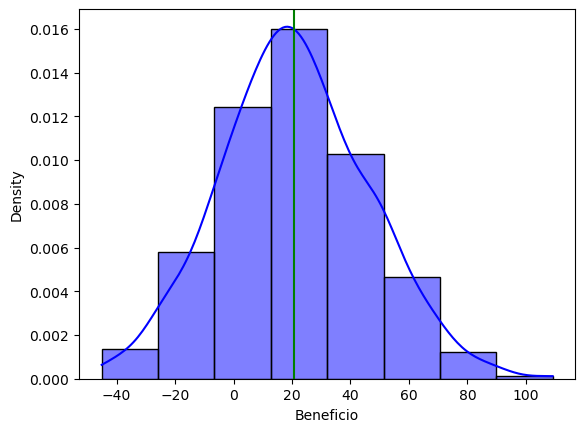

In [14]:
grupos = int(round(1+3.33*math.log10(100),0))
sns.histplot(beneficio_out, kde=True, bins=grupos, stat="density", alpha=0.5, color='blue')
plt.axvline(np.mean(beneficio_out), color="green")

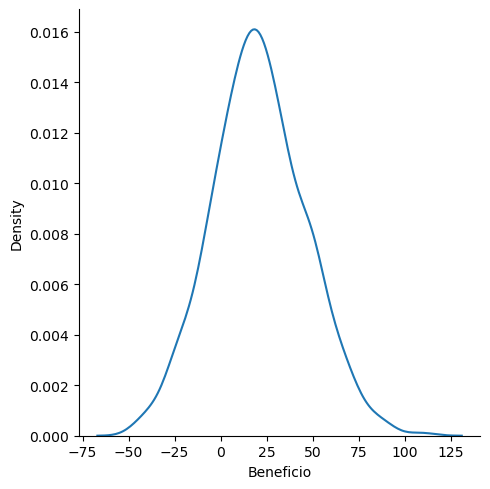

In [12]:
# sns.displot(beneficio_out, kind="ecdf")
sns.displot(beneficio_out, kind="kde")
